In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Data Collection
df = pd.read_excel("C:/Users/waghm/OneDrive/Documents/Project/Mobile_User_Dataset.xlsx")

In [8]:
# Tatal Size
df.size

7700

In [9]:
# Total Rows & Columns
df.shape

(700, 11)

In [13]:
# Take Sample Data
df.head()

,User_ID,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,Gender,User_Behavior_Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   700 non-null    int64  
 1   Device_Model              700 non-null    object 
 2   Operating_System          700 non-null    object 
 3   App_Usage_Time            700 non-null    int64  
 4   Screen_On_Time            700 non-null    float64
 5   Battery_Drain             700 non-null    int64  
 6   Number_of_Apps_Installed  700 non-null    int64  
 7   Data_Usage                700 non-null    int64  
 8   Age                       700 non-null    int64  
 9   Gender                    700 non-null    object 
 10  User_Behavior_Class       700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [23]:
# Check duplicated data
print(df.duplicated().sum())

0


In [24]:
# check missing Data
print(df.isnull().sum())

User_ID                     0
Device_Model                0
Operating_System            0
App_Usage_Time              0
Screen_On_Time              0
Battery_Drain               0
Number_of_Apps_Installed    0
Data_Usage                  0
Age                         0
Gender                      0
User_Behavior_Class         0
dtype: int64


In [26]:
# Define Target and Feature variable
X = df.drop(['User_ID', 'User_Behavior_Class'], axis=1)   # Feature
y = df['User_Behavior_Class']                             # Target

In [27]:
# Encode Categorical Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Device_Model', 'Operating_System', 'Gender']:
    X[col] = le.fit_transform(X[col])

In [31]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train The Model
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

D:\Program\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [35]:
y_pred_lr = lr.predict(X_test)
print("Logistic Accuracy: ", accuracy_score(y_test, y_pred_lr))

Logistic Accuracy:  0.7571428571428571


In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF Accuracy: ", accuracy_score(y_test, y_pred_rf))

RF Accuracy:  1.0


In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rf))
print("Classification Report: \n",classification_report(y_test, y_pred_rf))

Confusion Matrix: 
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [45]:
# Feature Importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
print(feat_imp.sort_values(ascending=False))

App_Usage_Time              0.234843
Battery_Drain               0.227869
Number_of_Apps_Installed    0.212164
Data_Usage                  0.200767
Screen_On_Time              0.122391
Age                         0.001224
Device_Model                0.000336
Gender                      0.000331
Operating_System            0.000076
dtype: float64


In [46]:
# Save Model
import joblib
joblib.dump(rf, "mobile_user_model.pkl")

['mobile_user_model.pkl']

In [47]:
# Make prediction
sample = X.iloc[[0]]
print("Predicted Class: ", rf.predict(sample))

Predicted Class:  [4]


In [49]:
num_df = df.select_dtypes(include=["int64", "float64"])

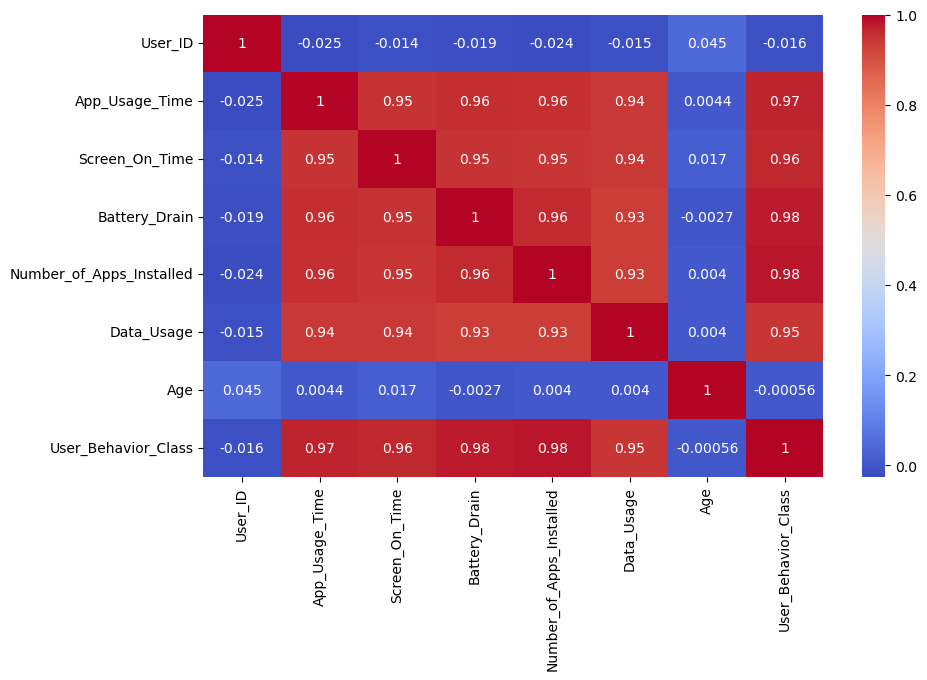

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [52]:
df.to_excel("Mobile_User_Cleaned.xlsx", index=False)